In [1]:
# Install required libraries
!pip install librosa transformers   

In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/PittCombined8class/mp3/252-2r.mp3
/kaggle/input/PittCombined8class/mp3/091-0r.mp3
/kaggle/input/PittCombined8class/mp3/488-0f.mp3
/kaggle/input/PittCombined8class/mp3/213-3.mp3
/kaggle/input/PittCombined8class/mp3/260-1f.mp3
/kaggle/input/PittCombined8class/mp3/306-0s.mp3
/kaggle/input/PittCombined8class/mp3/631-0.mp3
/kaggle/input/PittCombined8class/mp3/016-4r.mp3
/kaggle/input/PittCombined8class/mp3/527-1s.mp3
/kaggle/input/PittCombined8class/mp3/306-0f.mp3
/kaggle/input/PittCombined8class/mp3/283-1f.mp3
/kaggle/input/PittCombined8class/mp3/707-0f.mp3
/kaggle/input/PittCombined8class/mp3/544-0r.mp3
/kaggle/input/PittCombined8class/mp3/016-3f.mp3
/kaggle/input/PittCombined8class/mp3/144-1f.mp3
/kaggle/input/PittCombined8class/mp3/607-0r.mp3
/kaggle/input/PittCombined8class/mp3/049-3r.mp3
/kaggle/input/PittCombined8class/mp3/270-0s.mp3
/kaggle/input/PittCombined8class/mp3/140-3.mp3
/kaggle/input/PittCombined8class/mp3/474-0s.mp3
/kaggle/input/PittCombined8class/mp3/141-0.

In [3]:
# Define paths to data
cha_path = '/kaggle/input/PittCombined8class/cha'
mp3_path = '/kaggle/input/PittCombined8class/mp3'

In [4]:
# Import necessary libraries
import os
import librosa
import pandas as pd
from transformers import BertTokenizer, BertModel


In [5]:
# List files in directories
cha_files = [os.path.join(cha_path, file) for file in os.listdir(cha_path) if file.endswith('.cha')]
mp3_files = [os.path.join(mp3_path, file) for file in os.listdir(mp3_path) if file.endswith('.mp3')]

print(f"Found {len(cha_files)} CHA files and {len(mp3_files)} MP3 files.")

Found 1254 CHA files and 1252 MP3 files.


In [6]:
import os
import re
import random
from collections import defaultdict, Counter

def extract_diagnosis(cha_file):
    """Extracts the diagnosis from a CHAT transcript file."""
    with open(cha_file, 'r') as file:
        content = file.read()
    match = re.search(r'@ID:\s*[^|]*\|[^|]*\|[^|]*\|[^|]*\|[^|]*\|([^|]*)\|', content)
    return match.group(1) if match else None

# Paths to your CHA and MP3 files
cha_path = '/kaggle/input/PittCombined8class/cha'
mp3_path = '/kaggle/input/PittCombined8class/mp3'

# Load all CHA files and their diagnoses
cha_files = [f for f in os.listdir(cha_path) if f.endswith('.cha')]
diagnoses = [extract_diagnosis(os.path.join(cha_path, f)) for f in cha_files]

# Group files by diagnosis, ensuring corresponding MP3 exists
files_by_diagnosis = defaultdict(list)
for cha_file, diag in zip(cha_files, diagnoses):
    mp3_file = cha_file.replace('.cha', '.mp3')
    if os.path.exists(os.path.join(mp3_path, mp3_file)):
        files_by_diagnosis[diag].append(cha_file)




In [7]:
selected_files = []
for diag, files in files_by_diagnosis.items():
    if len(files) >= 10:
        selected_files.extend(random.sample(files, min(len(files), max(500 // len(files_by_diagnosis), 10))))
selected_files = random.sample(selected_files, min(500, len(selected_files)))

selected_diagnoses = [extract_diagnosis(os.path.join(cha_path, f)) for f in selected_files]
diagnosis_count = Counter(selected_diagnoses)

selected_mp3_files = [f.replace('.cha', '.mp3') for f in selected_files]
cha_files = [os.path.join(cha_path, f) for f in selected_files]
mp3_files = [os.path.join(mp3_path, f) for f in selected_mp3_files]

print("Selected CHA files:", cha_files)
print("Selected MP3 files:", mp3_files)
print("Diagnosis counts:", dict(diagnosis_count))


Selected CHA files: ['/kaggle/input/PittCombined8class/cha/220-0f.cha', '/kaggle/input/PittCombined8class/cha/528-0r.cha', '/kaggle/input/PittCombined8class/cha/065-0f.cha', '/kaggle/input/PittCombined8class/cha/238-0.cha', '/kaggle/input/PittCombined8class/cha/024-1f.cha', '/kaggle/input/PittCombined8class/cha/471-0.cha', '/kaggle/input/PittCombined8class/cha/248-1.cha', '/kaggle/input/PittCombined8class/cha/465-0.cha', '/kaggle/input/PittCombined8class/cha/295-1.cha', '/kaggle/input/PittCombined8class/cha/707-0.cha', '/kaggle/input/PittCombined8class/cha/707-0f.cha', '/kaggle/input/PittCombined8class/cha/061-0r.cha', '/kaggle/input/PittCombined8class/cha/656-0s.cha', '/kaggle/input/PittCombined8class/cha/065-2f.cha', '/kaggle/input/PittCombined8class/cha/279-1r.cha', '/kaggle/input/PittCombined8class/cha/248-0.cha', '/kaggle/input/PittCombined8class/cha/024-2s.cha', '/kaggle/input/PittCombined8class/cha/681-0f.cha', '/kaggle/input/PittCombined8class/cha/212-1f.cha', '/kaggle/input/Pi

In [8]:
cha_base_names = set([os.path.splitext(os.path.basename(f))[0] for f in cha_files])
mp3_base_names = set([os.path.splitext(os.path.basename(f))[0] for f in mp3_files])

unmatched_cha = cha_base_names - mp3_base_names
unmatched_mp3 = mp3_base_names - cha_base_names

print("Unmatched CHA files:", unmatched_cha)
print("Unmatched MP3 files:", unmatched_mp3)

Unmatched CHA files: set()
Unmatched MP3 files: set()


In [9]:
import librosa
from transformers import BertTokenizer, BertModel
import soundfile as sf

from transformers import BertTokenizer, BertModel

# Initialize BioBERT
tokenizer = BertTokenizer.from_pretrained("dmis-lab/biobert-v1.1")
model = BertModel.from_pretrained("dmis-lab/biobert-v1.1")

# Now you can use 'tokenizer' and 'model' as you did before in your pipeline


tokenizer_config.json:   0%|          | 0.00/49.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/213k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/462 [00:00<?, ?B/s]

/opt/conda/lib/python3.10/site-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


pytorch_model.bin:   0%|          | 0.00/433M [00:00<?, ?B/s]

In [10]:
import os
import librosa
import soundfile as sf

def preprocess_audio(mp3_file_path, output_wav_path):
    # Define output path within the writable directory
    output_wav_path = os.path.join('/kaggle/working', os.path.basename(output_wav_path))
    
    try:
        # Check if the WAV file already exists
        if not os.path.exists(output_wav_path):
            # Convert MP3 to WAV
            y, sr = librosa.load(mp3_file_path, sr=None)
            sf.write(output_wav_path, y, sr)
            print(f"Converted {mp3_file_path} to WAV.")
        else:
            print(f"WAV file already exists: {output_wav_path}")

        # Extract MFCC features
        y, sr = librosa.load(output_wav_path, sr=None)
        mfccs = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=13)
        return mfccs.mean(axis=1)
    except Exception as e:
        print(f"An error occurred while processing {mp3_file_path}: {str(e)}")
        return None

# Replace 'mp3_files' with the actual list of mp3 file paths
audio_features = [preprocess_audio(f, f.replace('.mp3', '.wav')) for f in mp3_files if f.endswith('.mp3')]


Converted /kaggle/input/PittCombined8class/mp3/220-0f.mp3 to WAV.
Converted /kaggle/input/PittCombined8class/mp3/528-0r.mp3 to WAV.
Converted /kaggle/input/PittCombined8class/mp3/065-0f.mp3 to WAV.
Converted /kaggle/input/PittCombined8class/mp3/238-0.mp3 to WAV.
Converted /kaggle/input/PittCombined8class/mp3/024-1f.mp3 to WAV.
Converted /kaggle/input/PittCombined8class/mp3/471-0.mp3 to WAV.
Converted /kaggle/input/PittCombined8class/mp3/248-1.mp3 to WAV.
Converted /kaggle/input/PittCombined8class/mp3/465-0.mp3 to WAV.
Converted /kaggle/input/PittCombined8class/mp3/295-1.mp3 to WAV.
Converted /kaggle/input/PittCombined8class/mp3/707-0.mp3 to WAV.
Converted /kaggle/input/PittCombined8class/mp3/707-0f.mp3 to WAV.
Converted /kaggle/input/PittCombined8class/mp3/061-0r.mp3 to WAV.
Converted /kaggle/input/PittCombined8class/mp3/656-0s.mp3 to WAV.
Converted /kaggle/input/PittCombined8class/mp3/065-2f.mp3 to WAV.
Converted /kaggle/input/PittCombined8class/mp3/279-1r.mp3 to WAV.
Converted /kaggl

In [11]:
# Define a function to preprocess text data
def preprocess_text(file_path):
    with open(file_path, 'r') as file:
        text = file.read()
    # Insert text cleaning code here as necessary
    inputs = tokenizer(text, return_tensors="pt", max_length=512, truncation=True, padding="max_length")
    outputs = model(**inputs)
    return outputs.last_hidden_state.squeeze().detach().numpy()

In [12]:
print(cha_files)

['/kaggle/input/PittCombined8class/cha/220-0f.cha', '/kaggle/input/PittCombined8class/cha/528-0r.cha', '/kaggle/input/PittCombined8class/cha/065-0f.cha', '/kaggle/input/PittCombined8class/cha/238-0.cha', '/kaggle/input/PittCombined8class/cha/024-1f.cha', '/kaggle/input/PittCombined8class/cha/471-0.cha', '/kaggle/input/PittCombined8class/cha/248-1.cha', '/kaggle/input/PittCombined8class/cha/465-0.cha', '/kaggle/input/PittCombined8class/cha/295-1.cha', '/kaggle/input/PittCombined8class/cha/707-0.cha', '/kaggle/input/PittCombined8class/cha/707-0f.cha', '/kaggle/input/PittCombined8class/cha/061-0r.cha', '/kaggle/input/PittCombined8class/cha/656-0s.cha', '/kaggle/input/PittCombined8class/cha/065-2f.cha', '/kaggle/input/PittCombined8class/cha/279-1r.cha', '/kaggle/input/PittCombined8class/cha/248-0.cha', '/kaggle/input/PittCombined8class/cha/024-2s.cha', '/kaggle/input/PittCombined8class/cha/681-0f.cha', '/kaggle/input/PittCombined8class/cha/212-1f.cha', '/kaggle/input/PittCombined8class/cha

In [13]:
# Process each file
text_embeddings = [preprocess_text(f) for f in cha_files]

In [14]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Assuming text_embeddings and audio_features are lists of numpy arrays
# Convert lists to numpy arrays
text_features = np.array(text_embeddings)
audio_features = np.stack(audio_features)

In [15]:
print(text_features)

[[[ 8.28088727e-03 -1.06783345e-01 -7.18130708e-01 ... -4.11452055e-01
    4.18095253e-02  3.90350848e-01]
  [ 1.52682858e-02  3.06966394e-01  2.62825817e-01 ...  6.29883766e-01
    6.81199610e-01  1.77725941e-01]
  [ 7.06670731e-02 -4.59005497e-02 -2.57499099e-01 ...  4.35878873e-01
   -4.03792448e-02  2.52150595e-01]
  ...
  [ 5.10441720e-01 -6.40794158e-01 -3.45574230e-01 ...  1.34817928e-01
    4.65616882e-01  6.56404644e-02]
  [ 2.77785927e-01 -5.06213784e-01 -1.14328504e-01 ...  3.84959996e-01
   -2.01249063e-01 -9.05793607e-02]
  [ 3.72264594e-01 -7.07179904e-01 -2.97450453e-01 ... -4.92262185e-01
    4.68208343e-01  2.18911901e-01]]

 [[ 2.03130677e-01  2.22945273e-01 -3.88950258e-01 ... -1.08122140e-01
    3.59253883e-01  1.30587265e-01]
  [ 1.13027282e-01  2.72840887e-01  2.19311759e-01 ...  7.59558618e-01
    7.68575072e-01  1.30235285e-01]
  [ 3.00516654e-02 -8.26817006e-03 -1.60393074e-01 ...  2.82216519e-01
   -4.70107608e-02  1.71033815e-01]
  ...
  [-1.40588162e-02  1.6

In [16]:
print(audio_features)

[[-4.68906860e+02  7.60602264e+01  1.13966680e+00 ... -7.17699718e+00
   6.28784132e+00 -2.69761610e+00]
 [-2.50909088e+02  1.14331276e+02  5.87368727e+00 ... -5.00531483e+00
   8.24434400e-01 -5.89958668e+00]
 [-4.79556824e+02  1.04345245e+02  1.49755135e+01 ... -8.28892612e+00
  -3.17402512e-01  5.64734697e-01]
 ...
 [-4.65371735e+02  1.07426216e+02  4.90625954e+00 ... -1.73793375e+00
   2.73845220e+00  1.20649004e+00]
 [-5.11408173e+02  1.07720482e+02  4.43110275e+00 ... -5.20031977e+00
  -1.51579928e+00 -8.82916355e+00]
 [-4.67274780e+02  1.09899582e+02  2.69069462e+01 ... -2.74323487e+00
   1.07552469e+00 -4.12012577e+00]]


In [17]:
text_features = np.mean(text_features, axis=1)


In [18]:
print(text_features)

[[ 0.14194494 -0.36319545 -0.19335726 ...  0.07151559  0.12340323
   0.21487278]
 [ 0.1855956   0.02936003 -0.12353145 ...  0.03761562  0.2619723
   0.04000283]
 [ 0.13824166 -0.28888747 -0.10117631 ...  0.17640507  0.15289676
   0.15885866]
 ...
 [ 0.19617021 -0.35700288 -0.06122723 ...  0.15529065  0.09360233
   0.1876064 ]
 [ 0.16200699 -0.1726777  -0.16362424 ...  0.14410372  0.1788295
   0.31430194]
 [ 0.14922212 -0.22847703 -0.11189916 ...  0.11021757  0.2055623
   0.2682359 ]]


In [19]:
# Ensure audio_features is 2D (it should already be if you've extracted features correctly)
if audio_features.ndim > 2:
    audio_features = np.mean(audio_features, axis=1)

In [20]:
# Combine text and audio features
combined_features = np.concatenate([text_features, audio_features], axis=1)

In [21]:
print(combined_features)

[[ 0.14194494 -0.36319545 -0.19335726 ... -7.176997    6.2878413
  -2.697616  ]
 [ 0.1855956   0.02936003 -0.12353145 ... -5.005315    0.8244344
  -5.8995867 ]
 [ 0.13824166 -0.28888747 -0.10117631 ... -8.288926   -0.3174025
   0.5647347 ]
 ...
 [ 0.19617021 -0.35700288 -0.06122723 ... -1.7379338   2.7384522
   1.20649   ]
 [ 0.16200699 -0.1726777  -0.16362424 ... -5.20032    -1.5157993
  -8.829164  ]
 [ 0.14922212 -0.22847703 -0.11189916 ... -2.7432349   1.0755247
  -4.120126  ]]


In [22]:
# Normalize the combined features
scaler = StandardScaler()
normalized_features = scaler.fit_transform(combined_features)

In [23]:
import re

def extract_diagnostic_code(cha_file):
    # Read the content of the .cha file
    with open(cha_file, 'r') as file:
        content = file.read()

    # Regex to find the diagnosis in the file content based on the updated structure
    match = re.search(r'@ID:\s*[^|]*\|[^|]*\|[^|]*\|[^|]*\|[^|]*\|([^|]*)\|\|', content)
    if match:
        return match.group(1).strip()
    return None

labels = [extract_diagnostic_code(f) for f in cha_files]

for label in labels[:10]:  # Print first 10 labels to verify
    print(label)


ProbableAD
MCI
MCI
ProbableAD
Memory
PossibleAD
Control
PossibleAD
Control
PossibleAD


In [24]:
from sklearn.preprocessing import LabelEncoder

# Encode labels as integers
label_encoder = LabelEncoder()
encoded_labels = label_encoder.fit_transform(labels)


In [25]:
print(encoded_labels)

[4 1 1 4 2 3 0 3 0 3 3 1 1 1 4 0 2 3 1 1 0 2 0 4 3 3 4 5 5 1 0 0 4 1 1 3 3
 0 1 3 2 0 0 4 3 4 1 4 4 3 2 0 5 0 3 4 4 4 0 3 3 1 0 3 0 0 1 2 0 1 3 5 0 3
 0 2 0 1 3 2 3 4 4 5 0 5 4 3 0 0 4 4 5 0 4 0 1 4 2 4 4 4 0 0 1 4 1 1 4 3 3
 1 0 1 0 1 3 3 1 0 3 1 4 0 4 3 0 0 5 3 1 3 4 1 4 4 1 1 3 1 3 3 4 5 5 0 4 1
 3 1 4 3 3 0 0 0 3 0 1 3 4 3 4 1 0 0 0 1 3 3 0 3 2 1 1 0 4 1 4 4 4 5 1 2 4
 3 1 1 1 3 3 5 1 3 3 0 3 5 3 4 0 0 0 0 1 4 0 5 0 0 4 3 4 0 0 5 0 1 4 5 0 4
 4 0 3 3 1 2 4 0 5 5 1 1 1 3 3 4 1 1 0 4 1 1 4 3 3 4 4 4 4 3 3 5 1 0 1 4 0
 4 4 1 1 4 0 1 3 3 3 1 1 3 3 1 4 1 4 0 4]


In [26]:
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, Dropout, Concatenate, Conv1D, GlobalAveragePooling1D, BatchNormalization
from tensorflow.keras.optimizers import Adam

In [27]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, Concatenate
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import StandardScaler

In [28]:
# Split data into train, validation, and test sets
X_train, X_test, y_train, y_test = train_test_split(combined_features, encoded_labels, test_size=0.4, random_state=42, stratify=encoded_labels)
X_train, X_val, y_train, y_val = train_test_split(X_test, y_test, test_size=0.5, random_state=42, stratify=y_test)  # 0.25 x 0.8 = 0.2

# One-hot encode the labels with a consistent number of classes across datasets
from tensorflow.keras.utils import to_categorical
num_classes = len(np.unique(encoded_labels))
y_train = to_categorical(y_train, num_classes=num_classes)
y_val = to_categorical(y_val, num_classes=num_classes)
y_test = to_categorical(y_test, num_classes=num_classes)


In [29]:
print("y_test",y_test)

y_test [[0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 1. 0.]
 [0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 1. 0.]
 [1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 1. 0.]
 [1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0.]
 [1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 1. 0. 0.]
 [0. 1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0.]
 [1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0.]
 [1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0.]
 [1. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0.]
 [0. 1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 1. 0.]
 [0. 0. 1. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0.]
 [1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 1. 0. 0.]
 [0. 1. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0.]
 [0. 1. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0.]
 [0. 0

In [30]:
from tensorflow.keras.regularizers import l2

# Model architecture
input_text = Input(shape=(768,))  # Text features from Clinical BERT
input_audio = Input(shape=(13,))  # Audio features, assuming MFCCs with 13 coefficients

# Text pathway
text_dense = Dense(128, activation='relu', kernel_regularizer=l2(0.1))(input_text)
text_bn = BatchNormalization()(text_dense)  # Add batch normalization
text_out = Dropout(0.5)(text_bn)  # Increase dropout rate


In [31]:
from tensorflow.keras.layers import Reshape

# Audio pathway
audio_reshape = Reshape((13, 1))(input_audio)
conv1 = Conv1D(64, kernel_size=3, activation='relu', kernel_regularizer=l2(0.1))(audio_reshape)
conv1_bn = BatchNormalization()(conv1)
conv1_pool = GlobalAveragePooling1D()(conv1_bn)
audio_out = Dropout(0.5)(conv1_pool)  # Increase dropout rate

In [32]:
# Fusion and output
concatenated = Concatenate()([text_out, audio_out])
dense_layer = Dense(64, activation='relu', kernel_regularizer=l2(0.1))(concatenated)  # Regularize dense layer

# Assuming y_train has already been one-hot encoded correctly
num_classes = y_train.shape[1]

# Adjust your output layer
output_layer = Dense(num_classes, activation='softmax')(dense_layer)


In [33]:
print(concatenated)

<KerasTensor shape=(None, 192), dtype=float32, sparse=False, name=keras_tensor_10>


In [34]:
from tensorflow.keras.metrics import Precision, Recall

# Compile model
model = Model(inputs=[input_text, input_audio], outputs=output_layer)
model.compile(optimizer=Adam(learning_rate=0.01), loss='categorical_crossentropy', 
              metrics=['accuracy', Precision(), Recall()])


In [35]:
# Fit model on training data
history=model.fit([X_train[:, :768], X_train[:, 768:]], y_train, validation_data=([X_val[:, :768], X_val[:, 768:]], y_val), epochs=100, batch_size=32)


Epoch 1/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 4s 655ms/step - accuracy: 0.1399 - loss: 32.2617 - precision: 0.1333 - recall: 0.0223 - val_accuracy: 0.2857 - val_loss: 22.4806 - val_precision: 0.5000 - val_recall: 0.0357
Epoch 2/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - accuracy: 0.4405 - loss: 20.7049 - precision: 0.5253 - recall: 0.1012 - val_accuracy: 0.2679 - val_loss: 14.6957 - val_precision: 0.6111 - val_recall: 0.1964
Epoch 3/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - accuracy: 0.5551 - loss: 13.3764 - precision: 0.7556 - recall: 0.1161 - val_accuracy: 0.2321 - val_loss: 10.0060 - val_precision: 0.4000 - val_recall: 0.2143
Epoch 4/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - accuracy: 0.5089 - loss: 8.9633 - precision: 0.7231 - recall: 0.2708 - val_accuracy: 0.3036 - val_loss: 7.4159 - val_precision: 0.5500 - val_recall: 0.1964
Epoch 5/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - accuracy: 0.5580 - loss: 6.6439 - precision: 0.7413 - recall: 0.2634 - val_accuracy: 0.3036 - val_loss: 6.284

In [36]:
# Evaluate the model on the test set
evaluation = model.evaluate([X_test[:, :768], X_test[:, 768:]], y_test)
print(f'Accuracy: {evaluation[1]*100:.2f}%, Precision: {evaluation[2]*100:.2f}%, Recall: {evaluation[3]*100:.2f}%')

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3603 - loss: 3.0450 - precision: 0.3246 - recall: 0.2625 
Accuracy: 33.04%, Precision: 31.11%, Recall: 25.00%


In [37]:
from sklearn.metrics import accuracy_score, precision_score, recall_score

# First, predict the classes using the model
predictions = model.predict([X_test[:, :768], X_test[:, 768:]])
predicted_classes = np.argmax(predictions, axis=1)
true_classes = np.argmax(y_test, axis=1)

# Calculate the accuracy, precision, and recall for each class using scikit-learn's functionality
# This handles all classes at once without needing to manually index each class
accuracy = accuracy_score(true_classes, predicted_classes) * 100
precision = precision_score(true_classes, predicted_classes, average=None, zero_division=0) * 100
recall = recall_score(true_classes, predicted_classes, average=None, zero_division=0) * 100

# Retrieve the class names from the label encoder
class_names = label_encoder.inverse_transform(np.unique(true_classes))

# Display per-class metrics
class_metrics = {}
for idx, class_name in enumerate(class_names):
    class_metrics[class_name] = {
        'Accuracy': accuracy,
        'Precision': precision[idx],
        'Recall': recall[idx]
    }

# Print per-class accuracy, precision, and recall
print("Per-class Metrics:")
for class_name, metrics in class_metrics.items():
    print(f"{class_name}: Accuracy={metrics['Accuracy']:.2f}%, Precision={metrics['Precision']:.2f}%, Recall={metrics['Recall']:.2f}%")


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
Per-class Metrics:
Control: Accuracy=33.04%, Precision=83.33%, Recall=40.00%
MCI: Accuracy=33.04%, Precision=0.00%, Recall=0.00%
Memory: Accuracy=33.04%, Precision=0.00%, Recall=0.00%
PossibleAD: Accuracy=33.04%, Precision=100.00%, Recall=8.00%
ProbableAD: Accuracy=33.04%, Precision=25.51%, Recall=100.00%
Vascular: Accuracy=33.04%, Precision=0.00%, Recall=0.00%


In [38]:
history.history

{'accuracy': [0.1785714328289032,
  0.4107142984867096,
  0.5357142686843872,
  0.4821428656578064,
  0.5714285969734192,
  0.5714285969734192,
  0.5892857313156128,
  0.6785714030265808,
  0.6785714030265808,
  0.6785714030265808,
  0.8035714030265808,
  0.75,
  0.7857142686843872,
  0.75,
  0.8035714030265808,
  0.7678571343421936,
  0.7857142686843872,
  0.6607142686843872,
  0.6607142686843872,
  0.8571428656578064,
  0.75,
  0.7321428656578064,
  0.8571428656578064,
  0.7857142686843872,
  0.8214285969734192,
  0.8035714030265808,
  0.7142857313156128,
  0.75,
  0.8035714030265808,
  0.8035714030265808,
  0.8571428656578064,
  0.8571428656578064,
  0.6785714030265808,
  0.7857142686843872,
  0.8392857313156128,
  0.8214285969734192,
  0.8214285969734192,
  0.7142857313156128,
  0.7857142686843872,
  0.7678571343421936,
  0.8392857313156128,
  0.6964285969734192,
  0.7857142686843872,
  0.7321428656578064,
  0.6785714030265808,
  0.8035714030265808,
  0.6785714030265808,
  0.857142

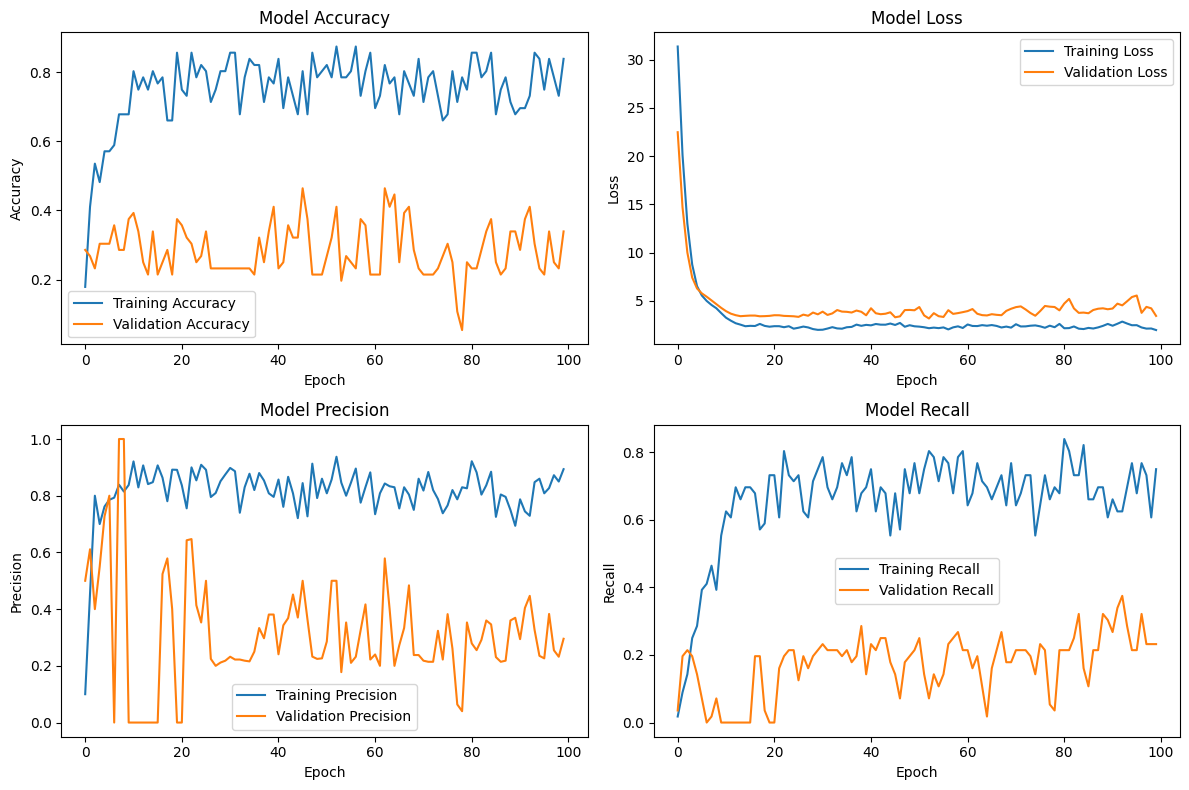

In [39]:
import matplotlib.pyplot as plt

def plot_training_history(history):
    # Plotting accuracy
    plt.figure(figsize=(12, 8))

    # Accuracy
    plt.subplot(2, 2, 1)
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title('Model Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()

    # Loss
    plt.subplot(2, 2, 2)
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Model Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()

    # Precision
    plt.subplot(2, 2, 3)
    plt.plot(history.history['precision'], label='Training Precision')
    plt.plot(history.history['val_precision'], label='Validation Precision')
    plt.title('Model Precision')
    plt.xlabel('Epoch')
    plt.ylabel('Precision')
    plt.legend()

    # Recall
    plt.subplot(2, 2, 4)
    plt.plot(history.history['recall'], label='Training Recall')
    plt.plot(history.history['val_recall'], label='Validation Recall')
    plt.title('Model Recall')
    plt.xlabel('Epoch')
    plt.ylabel('Recall')
    plt.legend()

    plt.tight_layout()
    plt.show()

# Call the function to plot the training history
plot_training_history(history)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 


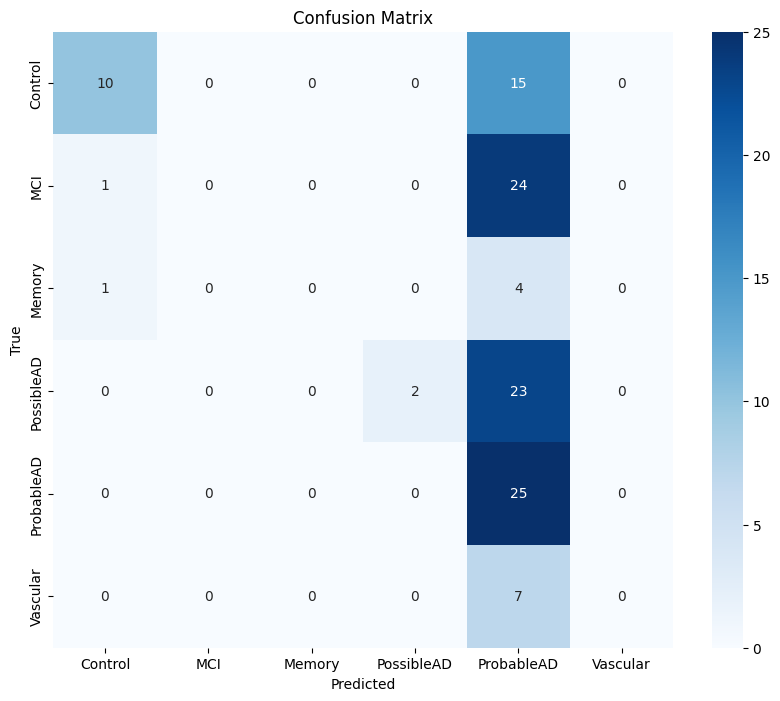

In [40]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Assuming 'y_test' are the true labels and 'predicted_classes' are the predicted labels
predictions = model.predict([X_test[:, :768], X_test[:, 768:]])
predicted_classes = np.argmax(predictions, axis=1)
true_classes = np.argmax(y_test, axis=1)

def plot_confusion_matrix(true_classes, predicted_classes, class_names):
    cm = confusion_matrix(true_classes, predicted_classes)
    plt.figure(figsize=(10, 8))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title('Confusion Matrix')
    plt.show()

# Example usage:
class_names = label_encoder.classes_  # Assuming you used a label encoder for your classes
plot_confusion_matrix(true_classes, predicted_classes, class_names)

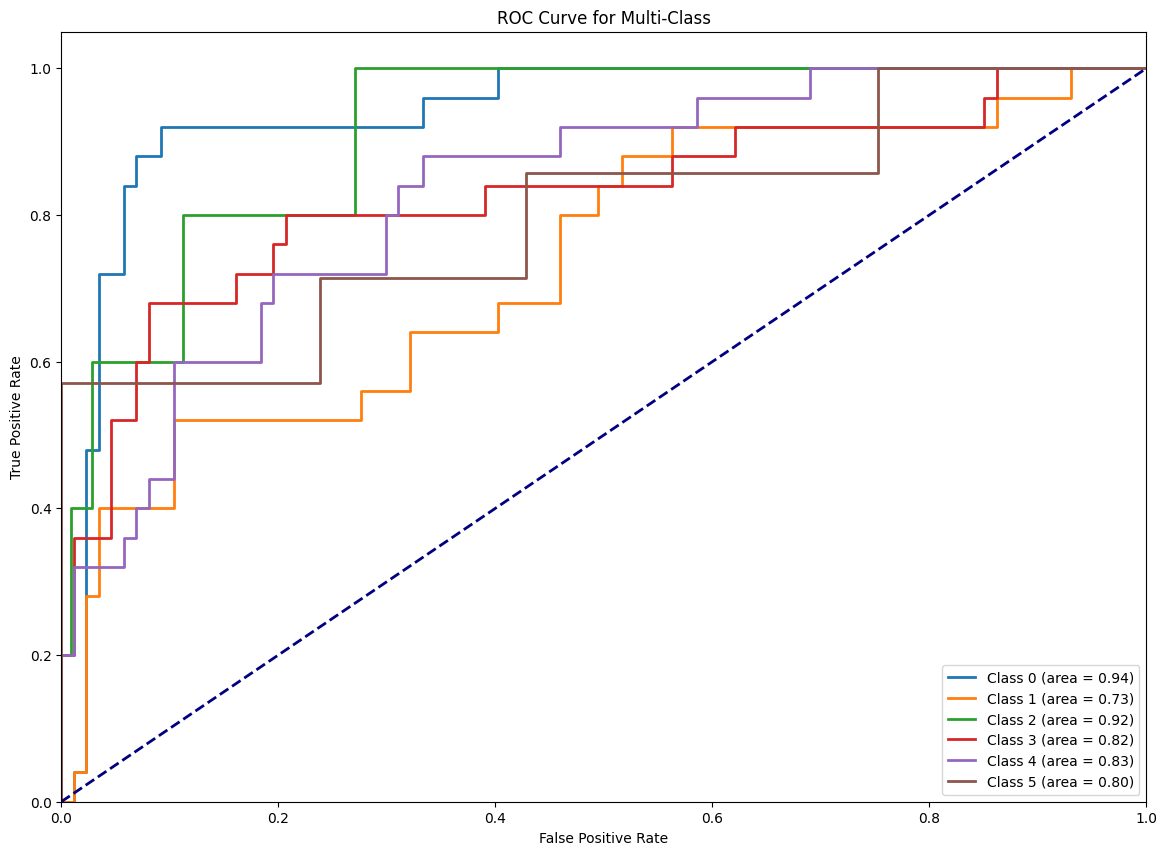

In [41]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize

# Binarize the labels for multi-class ROC curve
y_test_binarized = label_binarize(y_test, classes=np.arange(len(class_names)))

def plot_roc_curves(y_test_binarized, predictions, num_classes):
    fpr = dict()
    tpr = dict()
    roc_auc = dict()

    plt.figure(figsize=(14, 10))
    
    for i in range(num_classes):
        fpr[i], tpr[i], _ = roc_curve(y_test_binarized[:, i], predictions[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])
        plt.plot(fpr[i], tpr[i], lw=2, label=f'Class {i} (area = {roc_auc[i]:.2f})')

    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve for Multi-Class')
    plt.legend(loc="lower right")
    plt.show()

# Example usage:
plot_roc_curves(y_test_binarized, predictions, len(class_names))

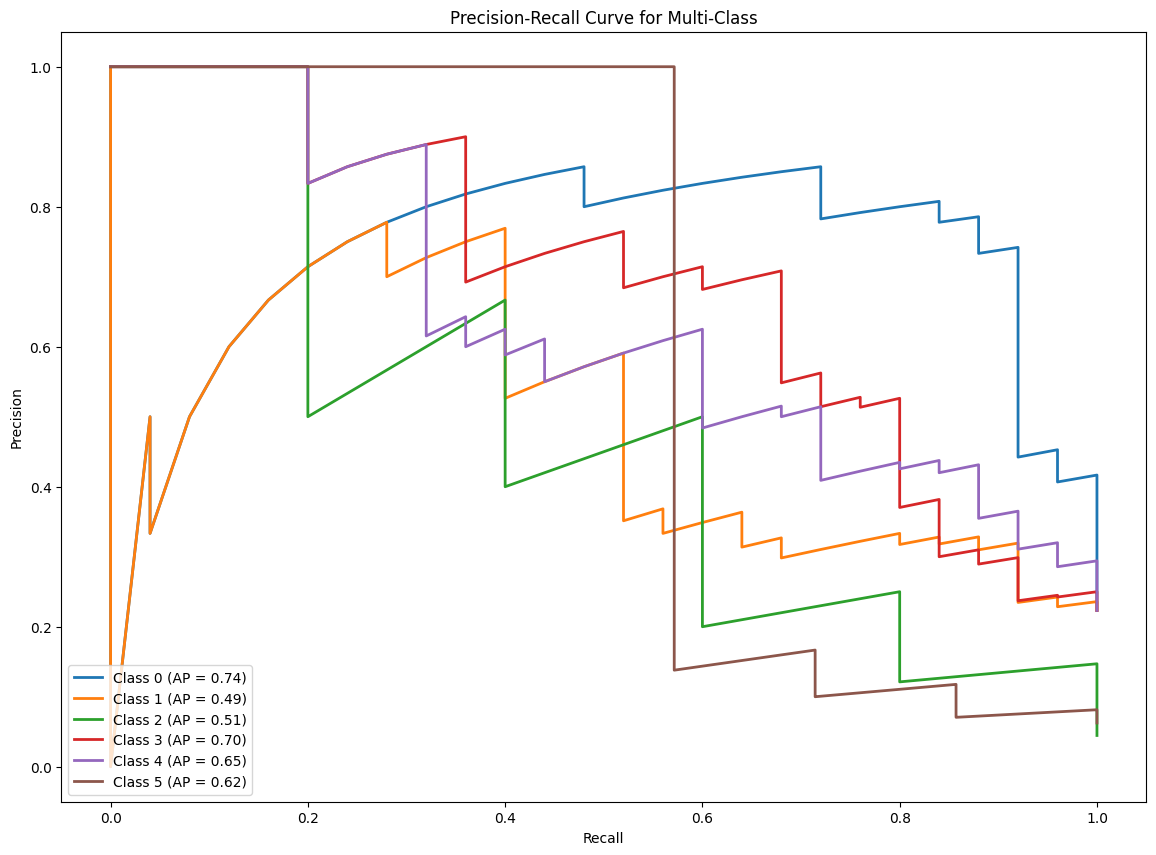

In [42]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score

def plot_precision_recall_curves(y_test_binarized, predictions, num_classes):
    plt.figure(figsize=(14, 10))
    
    for i in range(num_classes):
        precision, recall, _ = precision_recall_curve(y_test_binarized[:, i], predictions[:, i])
        average_precision = average_precision_score(y_test_binarized[:, i], predictions[:, i])
        plt.plot(recall, precision, lw=2, label=f'Class {i} (AP = {average_precision:.2f})')

    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title('Precision-Recall Curve for Multi-Class')
    plt.legend(loc="lower left")
    plt.show()

# Example usage:
plot_precision_recall_curves(y_test_binarized, predictions, len(class_names))

In [43]:
# Chi-squared
import scipy.stats as stats

# Assuming 'selected_diagnoses' is a list of diagnoses corresponding to 'selected_files'
diagnosis_counts = Counter(selected_diagnoses)
print("Diagnosis Counts:", diagnosis_counts)

# Expected counts assuming uniform distribution across diagnoses
expected_counts = [len(selected_files) / len(diagnosis_counts) for _ in range(len(diagnosis_counts))]

# Conducting the Chi-Square Test
chi_square_stat, p_value = stats.chisquare(list(diagnosis_counts.values()), f_exp=expected_counts)

print("Chi-Square Statistic:", chi_square_stat)
print("P-Value:", p_value)


Diagnosis Counts: Counter({'ProbableAD': 62, 'MCI': 62, 'PossibleAD': 62, 'Control': 62, 'Vascular': 19, 'Memory': 12})
Chi-Square Statistic: 62.5268817204301
P-Value: 3.6479162960200915e-12
